# SI 370 - Final Project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import nltk
import spacy

In [ ]:
!pip install gensim

     |████████████████████████████████| 24.1 MB 18.0 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
data = pd.read_csv('netflix_titles.csv')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# EDA

In [ ]:
data.shape

(8807, 12)

In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.isnull().sum()
# director, cast, country, date added, rating, duration have null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Type

In [ ]:
types = data.groupby('type')['type'].count().to_frame()
types = types.rename({'type': 'count'}, axis=1)
types

,count
type,
Movie,6131
TV Show,2676


In [ ]:
# https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 50, y[i], ha = 'center')

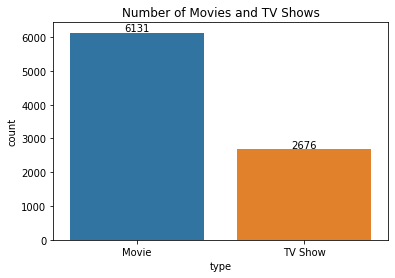

In [ ]:
sns.barplot(x = types.index, y = types['count'])
plt.title('Number of Movies and TV Shows')
addlabels(types.index, types['count'])

### Title

In [ ]:
data.title.isnull().sum()

0

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()
def sentiment_scores(docx):
    return sent_analyzer.polarity_scores(docx.text)

In [ ]:
!python -m spacy download en

2021-11-27 22:19:10.527010: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-27 22:19:10.527074: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 12.6 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
from spacy.tokens import Doc
Doc.set_extension("sentimenter",getter=sentiment_scores)

In [ ]:
data['title_sentiment_score'] = data['title'].apply(lambda x: nlp(x)._.sentimenter['compound'])

In [ ]:
data[['title','title_sentiment_score']].sort_values(by='title_sentiment_score', ascending=False)

,title,title_sentiment_score
1075,My Love: Six Stories of True Love,0.9042
5865,Marvel Super Hero Adventures: Frost Fight!,0.8858
5340,LEGO Marvel Super Heroes: Avengers Reassembled!,0.8832
4140,LEGO Marvel Super Heroes: Guardians of the Galaxy,0.8750
4139,LEGO Marvel Super Heroes: Black Panther,0.8750
...,...,...
3884,Ash vs. Evil Dead,-0.8658
1073,Motu Patlu Kung Fu Kings 4 The Challenge of Ku...,-0.8779
3737,Kill la Kill,-0.8860
3863,"Extremely Wicked, Shockingly Evil and Vile",-0.9375


In [ ]:
data.title_sentiment_score.value_counts()

 0.0000    6552
 0.6369     142
 0.4019      88
 0.5106      68
-0.5994      63
           ... 
-0.0790       1
 0.1877       1
 0.5080       1
 0.8271       1
 0.7172       1
Name: title_sentiment_score, Length: 205, dtype: int64

Text(0.5, 1.0, 'Distribution of Sentiment Scores')

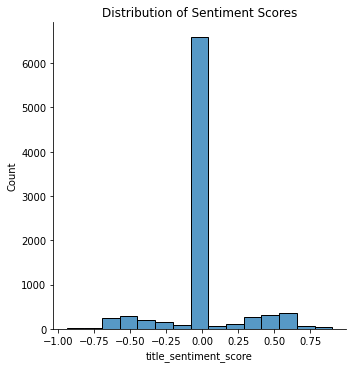

In [ ]:
sns.displot(data['title_sentiment_score'])
plt.title('Distribution of Sentiment Scores')

Text(0.5, 1.0, 'Distribution of Sentiment Scores in TV Shows')

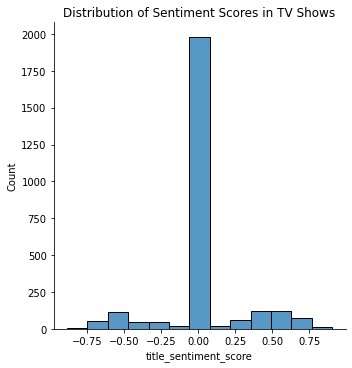

In [ ]:
sns.displot(data[data['type'] == 'TV Show']['title_sentiment_score'])
plt.title('Distribution of Sentiment Scores in TV Shows')

Text(0.5, 1.0, 'Distribution of Sentiment Scores in Movies')

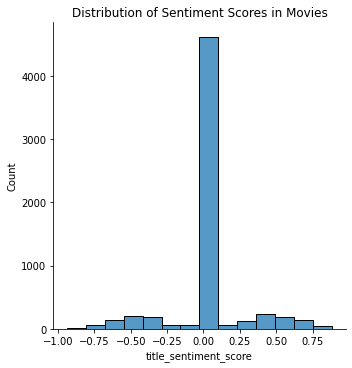

In [ ]:
sns.displot(data[data['type'] == 'Movie']['title_sentiment_score'])
plt.title('Distribution of Sentiment Scores in Movies')

Text(0.5, 1.0, 'Sentiment Scores Over Time')

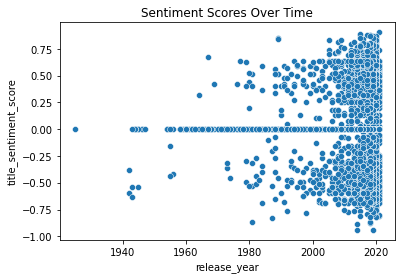

In [ ]:
sns.scatterplot(x=data['release_year'], y=data['title_sentiment_score'])
plt.title('Sentiment Scores Over Time')

### Director

In [ ]:
data.director.value_counts()

Rajiv Chilaka                19
Raúl Campos, Jan Suter       18
Marcus Raboy                 16
Suhas Kadav                  16
Jay Karas                    14
                             ..
Steven Tsuchida               1
Navot Papushado               1
Yuen Woo-ping                 1
Roman Atwood, Ben Pluimer     1
Ali Yorgancıoğlu              1
Name: director, Length: 4528, dtype: int64

In [ ]:
data.director.isnull().sum()

2634

In [ ]:
counts = data.groupby('director')['director'].count()
counts = counts.to_frame()
counts = counts.rename({'director': 'media_count'}, axis=1)
counts = counts.reset_index()
counts

,director,media_count
0,A. L. Vijay,2
1,A. Raajdheep,1
2,A. Salaam,1
3,A.R. Murugadoss,2
4,Aadish Keluskar,1
...,...,...
4523,Çagan Irmak,1
4524,Ísold Uggadóttir,1
4525,Óskar Thór Axelsson,1
4526,Ömer Faruk Sorak,2


In [ ]:
director_sentiments = data.groupby('director')['title_sentiment_score'].mean().sort_values(ascending=False)
director_sentiments = director_sentiments.to_frame().reset_index()
director_sentiments = pd.merge(director_sentiments, counts, on='director', how='left').set_index('director')
director_sentiments.media_count.value_counts()

1     3661
2      518
3      189
4       68
5       39
6       18
7       12
8       11
12       3
16       2
9        1
13       1
10       1
14       1
18       1
11       1
19       1
Name: media_count, dtype: int64

Text(0.5, 1.0, 'Directors with the Highest Average Title Sentiment Score')

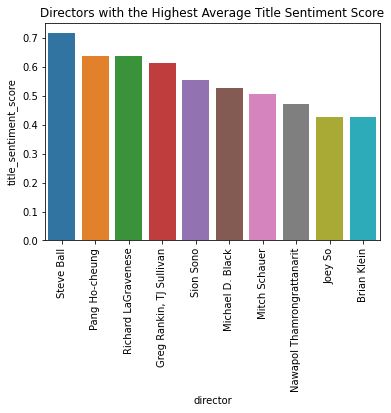

In [ ]:
sns.barplot(x=director_sentiments[director_sentiments['media_count'] > 1].index[:10], y=director_sentiments[director_sentiments['media_count'] > 1]['title_sentiment_score'][:10])
plt.xticks(rotation=90)
plt.title('Directors with the Highest Average Title Sentiment Score')

Text(0.5, 1.0, 'Directors with the Lowest Average Title Sentiment Score')

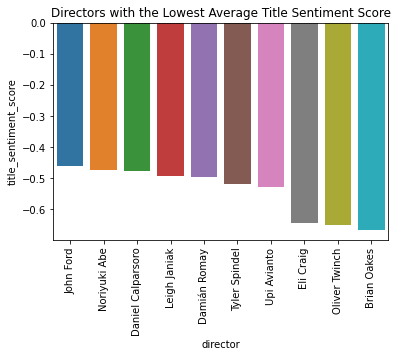

In [ ]:
sns.barplot(x=director_sentiments[director_sentiments['media_count'] > 1].index[-10:], y=director_sentiments[director_sentiments['media_count'] > 1]['title_sentiment_score'][-10:])
plt.xticks(rotation=90)
plt.title('Directors with the Lowest Average Title Sentiment Score')

### Cast

In [ ]:
data['cast'][:10]

0                                                  NaN
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                  NaN
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5    Kate Siegel, Zach Gilford, Hamish Linklater, H...
6    Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
7    Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
8    Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...
9    Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
Name: cast, dtype: object

In [ ]:
data['cast'].isnull().sum()
#how to fill null cast

825

In [ ]:
type(data['cast'][1])

str

In [ ]:
def cast_length(x):
    if type(x) == float:
        return 0
    else:
        return len(x.split(', '))

data['cast_length'] = data['cast'].apply(cast_length)
data['cast_length'].min()

0

Text(0.5, 1.0, 'cast length')

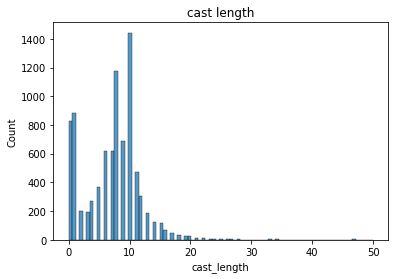

In [ ]:
sns.histplot(data=data, x=data["cast_length"], multiple="dodge")
plt.title('cast length')

### Country

In [ ]:
data['country'].value_counts()

United States                      2818
India                               972
United Kingdom                      419
Japan                               245
South Korea                         199
                                   ... 
France, Canada, China, Cambodia       1
New Zealand, United Kingdom           1
Cambodia, United States               1
Turkey, India                         1
Norway, Denmark, Sweden               1
Name: country, Length: 748, dtype: int64

In [ ]:
def get_first_country(x):
    if type(x) == float:
        return x
    else:
        split_country_list = x.split(', ')
        return split_country_list[0]

data['first_country'] = data['country'].apply(get_first_country)

In [ ]:
data['first_country'].isnull().sum()

831

In [ ]:
!pip install pycountry-convert

     |████████████████████████████████| 10.1 MB 31.3 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=877f4fcdd85e5226665d98a59427cb051f4e24f01e6ab93d7916d749dc90e3b2
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

def get_country_code(x):
    try:
        cn_a2_code =  country_name_to_country_alpha2(x)
    except:
        cn_a2_code = 'Unknown' 
    return cn_a2_code


def get_continent(x):
    try:
        cn_continent = country_alpha2_to_continent_code(x)
    except:
        cn_continent = 'Unknown' 
    return cn_continent

data['country_code'] = data['first_country'].apply(get_country_code)
data['continent_code'] = data['country_code'].apply(get_continent)
data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,first_country,country_code,continent_code
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,US,NA
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,ZA,AF
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,Unknown,Unknown
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,Unknown,Unknown
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,IN,AS


In [ ]:
#installation
!pip install geopy

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


### Date Added

In [ ]:
data['date_added'].value_counts()

January 1, 2020       109
November 1, 2019       89
March 1, 2018          75
December 31, 2019      74
October 1, 2018        71
                     ... 
October 28, 2017        1
October 21, 2017        1
September 22, 2019      1
November 14, 2014       1
 November 3, 2015       1
Name: date_added, Length: 1767, dtype: int64

In [ ]:
data['date_added'][0]

'September 25, 2021'

In [ ]:
from datetime import datetime

def get_date(x):
    if type(x) == float:
        return x
    else:
        x = x.strip(' ')
        datetime_object = datetime.strptime(x, '%B %d, %Y')
        return datetime_object

data['date'] = data['date_added'].apply(get_date)
type(data['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
data['year'] = pd.DatetimeIndex(data['date']).year
data.groupby(by=['year']).count()['show_id']

year
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: show_id, dtype: int64

Text(0.5, 1.0, 'year')

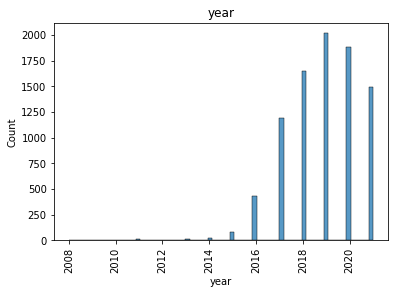

In [ ]:
sns.histplot(data=data, x=data["year"], multiple="dodge")

plt.xticks(rotation = 90)
plt.title('year')

In [ ]:
display(data['date'].min())
display(data['date'].max())

Timestamp('2008-01-01 00:00:00')

Timestamp('2021-09-25 00:00:00')

### Release Year

In [ ]:
data['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64

Text(0.5, 1.0, 'release year')

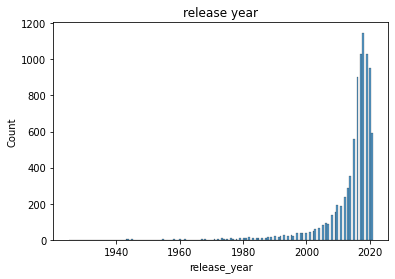

In [ ]:
sns.histplot(data=data, x=data["release_year"], multiple="dodge")

plt.title('release year')

### Rating

In [ ]:
sns.countplot(x = data['rating'] )
plt.xticks(rotation=45)
plt.title('Ratings')

NameError: name 'sns' is not defined

### Duration

In [ ]:
data['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
93 min        146
             ... 
214 min         1
229 min         1
273 min         1
167 min         1
253 min         1
Name: duration, Length: 220, dtype: int64

In [ ]:
dur_series = data['duration'].dropna()
dur_season = dur_series[dur_series.str.contains('Season')]
dur_season_groups = dur_season.value_counts()
dur_season_groups

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1 Season'),
  Text(1, 0, '2 Seasons'),
  Text(2, 0, '3 Seasons'),
  Text(3, 0, '4 Seasons'),
  Text(4, 0, '5 Seasons'),
  Text(5, 0, '6 Seasons'),
  Text(6, 0, '7 Seasons'),
  Text(7, 0, '8 Seasons'),
  Text(8, 0, '9 Seasons'),
  Text(9, 0, '10 Seasons'),
  Text(10, 0, '13 Seasons'),
  Text(11, 0, '15 Seasons'),
  Text(12, 0, '12 Seasons'),
  Text(13, 0, '11 Seasons'),
  Text(14, 0, '17 Seasons')])

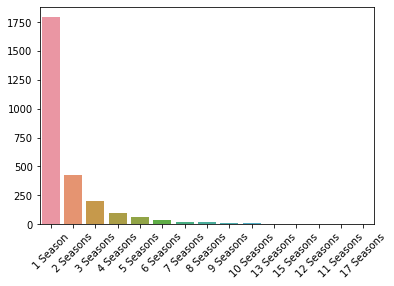

In [ ]:
sns.barplot(x = dur_season_groups.index , y = dur_season_groups.values )
plt.xticks(rotation=45)

In [ ]:
dur_min = dur_series[dur_series.str.contains('min')]
dur_min_groups = dur_min.value_counts()
dur_min_groups

90 min     152
93 min     146
94 min     146
97 min     146
91 min     144
          ... 
18 min       1
186 min      1
8 min        1
201 min      1
205 min      1
Name: duration, Length: 205, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '90 min'),
  Text(1, 0, '93 min'),
  Text(2, 0, '94 min'),
  Text(3, 0, '97 min'),
  Text(4, 0, '91 min'),
  Text(5, 0, '95 min'),
  Text(6, 0, '96 min'),
  Text(7, 0, '92 min'),
  Text(8, 0, '102 min'),
  Text(9, 0, '98 min'),
  Text(10, 0, '99 min'),
  Text(11, 0, '101 min'),
  Text(12, 0, '88 min'),
  Text(13, 0, '103 min'),
  Text(14, 0, '106 min'),
  Text(15, 0, '100 min'),
  Text(16, 0, '89 min'),
  Text(17, 0, '104 min'),
  Text(18, 0, '86 min'),
  Text(19, 0, '87 min'),
  Text(20, 0, '105 min'),
  Text(21, 0, '107 min'),
  Text(22, 0, '110 min'),
  Text(23, 0, '108 min'),
  Text(24, 0, '116 min')])

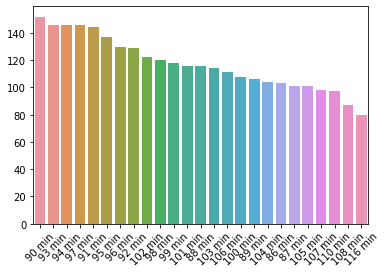

In [ ]:
sns.barplot(x = dur_min_groups.index[:25] , y = dur_min_groups.values[:25] )
plt.xticks(rotation=45)

### Listed In

In [ ]:
from collections import Counter

genres = list(data['listed_in'])
gen=[]
# Separating genres
for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
        
genre_count = Counter(gen)
genre_count = dict(genre_count)
genre_count

{'Documentaries': 869,
 'InternationalTVShows': 1351,
 'TVDramas': 763,
 'TVMysteries': 98,
 'CrimeTVShows': 470,
 'TVAction&Adventure': 168,
 'Docuseries': 395,
 'RealityTV': 255,
 'RomanticTVShows': 370,
 'TVComedies': 581,
 'TVHorror': 75,
 'Children&FamilyMovies': 641,
 'Dramas': 2427,
 'IndependentMovies': 756,
 'InternationalMovies': 2752,
 'BritishTVShows': 253,
 'Comedies': 1674,
 'Spanish-LanguageTVShows': 174,
 'Thrillers': 577,
 'RomanticMovies': 616,
 'Music&Musicals': 375,
 'HorrorMovies': 357,
 'Sci-Fi&Fantasy': 243,
 'TVThrillers': 57,
 "Kids'TV": 451,
 'Action&Adventure': 859,
 'TVSci-Fi&Fantasy': 84,
 'ClassicMovies': 116,
 'AnimeFeatures': 71,
 'SportsMovies': 219,
 'AnimeSeries': 176,
 'KoreanTVShows': 151,
 'Science&NatureTV': 92,
 'TeenTVShows': 69,
 'CultMovies': 71,
 'TVShows': 16,
 'Faith&Spirituality': 65,
 'LGBTQMovies': 102,
 'Stand-UpComedy': 343,
 'Movies': 57,
 'Stand-UpComedy&TalkShows': 56,
 'Classic&CultTV': 28}

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

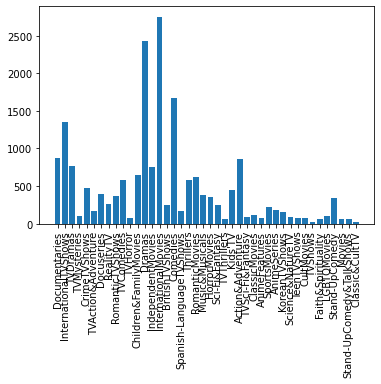

In [ ]:
plt.bar(genre_count.keys(), genre_count.values())
plt.xticks(rotation=90)

### Description

In [ ]:
nltk.download('vader_lexicon')

NameError: name 'nltk' is not defined

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()
def sentiment_scores(docx):
    return sent_analyzer.polarity_scores(docx.text)

In [ ]:
! python -m spacy download en

2021-12-01 17:14:26.026099: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-01 17:14:26.026150: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 13.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load('en_core_web_sm')

NameError: name 'spacy' is not defined

In [ ]:
from spacy.tokens import Doc
Doc.set_extension("sentimenter",getter=sentiment_scores)

ValueError: [E090] Extension 'sentimenter' already exists on Doc. To overwrite the existing extension, set `force=True` on `Doc.set_extension`.

In [ ]:
data['description_sentiment_score'] = data['description'].apply(lambda x: nlp(x)._.sentimenter['compound'])

In [ ]:
data[['title','description','description_sentiment_score']].sort_values(by='description_sentiment_score', ascending=False)

,title,description,description_sentiment_score
4403,Medal of Honor,Honoring service members whose courage merited...,0.9709
7808,Qué pena tu serie,"Javier is happily in love with Sofia, so when ...",0.9657
733,LEGO Friends: The Power of Friendship,Five best friends face adventures side by side...,0.9647
648,Too Hot to Handle,"On the shores of paradise, gorgeous singles me...",0.9625
3442,The Spooky Tale of Captain Underpants Hack-a-ween,"When Melvin tries to cancel Halloween, clever ...",0.9606
...,...,...,...
4477,W/O Ram,Frustrated with the stalled investigation into...,-0.9648
3190,Cut Bank,A small-town dreamer is sure he's landed on a ...,-0.9668
1593,Kings of Jo'Burg,The Masire brothers rule Johannesburg's crimin...,-0.9694
3020,Soul Eater,Maka and the other students at the Death Weapo...,-0.9705


In [ ]:
data.description_sentiment_score.value_counts()

 0.0000    847
 0.4019    138
-0.3818    107
-0.5994    101
 0.4215    100
          ... 
 0.7745      1
 0.8847      1
-0.4295      1
 0.9099      1
 0.9278      1
Name: description_sentiment_score, Length: 796, dtype: int64

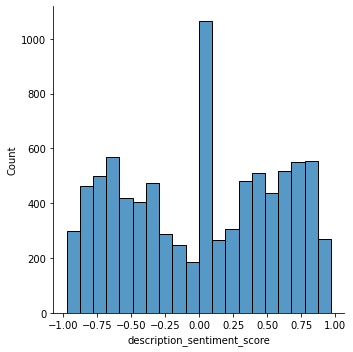

In [ ]:
sns.displot(data['description_sentiment_score'])

### Cleaning

In [ ]:
data.isnull().sum()
# director, cast, country, date added, rating, duration have null values

show_id                           0
type                              0
title                             0
director                       2634
cast                            825
country                         831
date_added                       10
release_year                      0
rating                            4
duration                          3
listed_in                         0
description                       0
title_sentiment_score             0
cast_length                       0
first_country                   831
date                             10
description_sentiment_score       0
dtype: int64

In [ ]:
null_cols = ['cast', 'country', 'director']
for col in null_cols:
    data[col] = data[col].fillna('')
data['date_added'] = data['date_added'].fillna('N/A')
data['rating'] = data['rating'].fillna('N/A')

In [ ]:
data.isnull().sum()

show_id                          0
type                             0
title                            0
director                         0
cast                             0
country                          0
date_added                       0
release_year                     0
rating                           0
duration                         3
listed_in                        0
description                      0
title_sentiment_score            0
cast_length                      0
first_country                  831
date                            10
description_sentiment_score      0
dtype: int64

In [ ]:
data[data['duration'].isna() == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_sentiment_score,cast_length,first_country,date,description_sentiment_score
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",0.0000,1,United States,2017-04-04,0.5994
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,0.4019,1,United States,2016-09-16,0.3612
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,0.3612,1,United States,2016-08-15,-0.6486


In [ ]:
movies = data[data['type'] == 'Movie']
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_sentiment_score,cast_length,first_country,date,description_sentiment_score
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",-0.8225,0,United States,2021-09-25,-0.2960
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,0.0000,10,NaN,2021-09-24,0.8402
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",0.0000,8,United States,2021-09-24,-0.7845
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,0.0000,11,United States,2021-09-24,-0.6249
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,0.0000,11,Germany,2021-09-23,-0.9419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,0.0000,6,United Arab Emirates,2016-03-09,0.0000
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",0.0000,10,United States,2019-11-20,-0.6808
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,0.0000,7,United States,2019-11-01,-0.2732
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",0.0000,9,United States,2020-01-11,-0.6808


In [ ]:
mode = movies.duration.mode()[0]
mode

'90 min'

In [ ]:
data['duration'] = data['duration'].fillna(mode)

In [ ]:
data.isnull().sum()

show_id                          0
type                             0
title                            0
director                         0
cast                             0
country                          0
date_added                       0
release_year                     0
rating                           0
duration                         0
listed_in                        0
description                      0
title_sentiment_score            0
cast_length                      0
first_country                  831
date                            10
description_sentiment_score      0
dtype: int64

### Recommender

https://www.kaggle.com/karan842/netflix-recommendation-and-eda

#### Recommendation by Title

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
data['description'] = data['description'].fillna('')

#TF-IDF matrix by fitting and transforming using the called function above
tfidf_matrix = vectorizer.fit_transform(data['description'])

tfidf_matrix

<8807x18895 sparse matrix of type '<class 'numpy.float64'>'
	with 121374 stored elements in Compressed Sparse Row format>

In [ ]:
#Linear Kernel
from sklearn.metrics.pairwise import linear_kernel

#linear kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(data.index, index = data['title']).drop_duplicates()

In [ ]:
def recommender_title(title, cosine_sim=cosine_sim):
    idx = indices[title]
    
    #Get the pairwise similarity scores of all movies with that inputed title
    similiarity_scores = list(enumerate(cosine_sim[idx]))
        
    #Sort the movies based on the similarity scores from high to low
    similiarity_scores = sorted(similiarity_scores, key=lambda x:x[1], reverse=True)
    
    #Get the scores of the 10 most similar movies - the first one would be same title
    similiarity_scores = similiarity_scores[1:11]
    
    #Get the movie indices
    netflix_indices = [i[0] for i in similiarity_scores]
    
    info = []
    for i in similiarity_scores:
        info.append((data['title'].iloc[i[0]], i[1]))
    return info



In [ ]:
recommender_title('Friends')

[('Manhattan Romance', 0.15237026907479903),
 ('BoJack Horseman', 0.15028953368141512),
 ('Things Heard & Seen', 0.14949271133327652),
 ('Episodes', 0.14853697304061317),
 ('Studio 54', 0.1424046010458695),
 ("Dad's Army", 0.14049027459152919),
 ('Trailer Park Boys', 0.13427085466841834),
 ('Single Ladies Senior', 0.1270081801514374),
 ('Why Are You Like This', 0.12494353136358004),
 ('Menahi', 0.12364054398185152)]

Text(0.5, 1.0, 'Similarity Scores for Top 10 Recommendations')

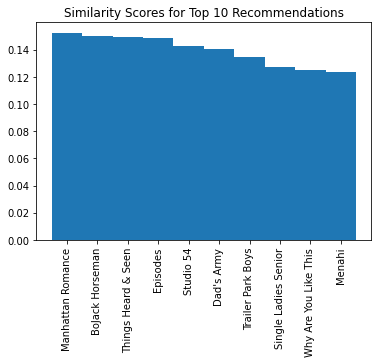

In [ ]:
import numpy as np                                                               
import matplotlib.pyplot as plt

recommendations = recommender_title('Friends')

labels, ys = zip(*recommendations)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels, rotation=90) #Replace default x-ticks with xs, then replace xs with labels
plt.title('Similarity Scores for Top 10 Recommendations')


In [ ]:
def length_list(x):
    if type(x) == float:
        return 0
    else:
        return len(x.split(', '))
    


data['length_listed_in'] = data['listed_in'].apply(length_list)
data['length_listed_in'].max()

3

In [ ]:
def list_1(x):
    if type(x) == float:
        return None
    else:
        l = x.split(', ')
        return l[0]

data['listed_in_1'] = data['listed_in'].apply(list_1)

In [ ]:
def list_2(x):
    if type(x) == float:
        return None
    else:
        l = x.split(', ')
        if len(l) == 1:
            return None
        elif len(l) > 1:
            return l[1]

data['listed_in_2'] = data['listed_in'].apply(list_2)


In [ ]:
def list_3(x):
    if type(x) == float:
        return None
    else:
        l = x.split(', ')
        if len(l) == 1:
            return None
        elif len(l) == 2:
            return None
        else:
            return l[2]

data['listed_in_3'] = data['listed_in'].apply(list_3)

In [ ]:
display(data['listed_in_1'].unique())
display(data['listed_in_2'].unique())
display(data['listed_in_3'].unique())

array(['Documentaries', 'International TV Shows', 'Crime TV Shows',
       'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas',
       'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers',
       'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
       'Anime Series', 'International Movies', 'Sci-Fi & Fantasy',
       'Classic Movies', 'TV Shows', 'Stand-Up Comedy',
       'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows',
       'Cult Movies', 'Independent Movies', 'TV Horror',
       'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies'],
      dtype=object)

array([None, 'TV Dramas', 'International TV Shows', 'Reality TV',
       'Romantic TV Shows', 'TV Horror', 'Independent Movies', 'Dramas',
       'Docuseries', 'International Movies', 'Comedies', 'Crime TV Shows',
       'Spanish-Language TV Shows', 'TV Action & Adventure',
       'Sci-Fi & Fantasy', 'TV Comedies', 'TV Sci-Fi & Fantasy',
       'Classic Movies', 'Horror Movies', 'Thrillers', 'Anime Features',
       "Kids' TV", 'Korean TV Shows', 'Sports Movies', 'Music & Musicals',
       'Science & Nature TV', 'Romantic Movies', 'Cult Movies',
       'Children & Family Movies', 'Faith & Spirituality', 'LGBTQ Movies',
       'Teen TV Shows', 'TV Mysteries', 'Stand-Up Comedy & Talk Shows',
       'Documentaries', 'TV Thrillers', 'Classic & Cult TV',
       'Stand-Up Comedy'], dtype=object)

array([None, 'TV Mysteries', 'TV Action & Adventure', 'TV Comedies',
       'International Movies', 'International TV Shows', 'Docuseries',
       'TV Dramas', 'Romantic Movies', 'Reality TV', 'Music & Musicals',
       'TV Thrillers', 'Thrillers', 'Dramas', 'TV Sci-Fi & Fantasy',
       'Sports Movies', 'Romantic TV Shows', 'Teen TV Shows',
       'Spanish-Language TV Shows', 'Independent Movies', 'Cult Movies',
       'Sci-Fi & Fantasy', 'Comedies', 'Children & Family Movies',
       'Science & Nature TV', 'Classic Movies', 'TV Horror',
       'Stand-Up Comedy & Talk Shows', 'LGBTQ Movies',
       'Faith & Spirituality', 'Horror Movies', 'Korean TV Shows',
       "Kids' TV", 'Documentaries'], dtype=object)

In [ ]:
indices_genre = pd.Series(data.index, index = data['listed_in_1']).drop_duplicates()

In [ ]:
def recommender_genre(genre, cosine_sim=cosine_sim):
    idx = indices_genre[genre]
    # print(cosine_sim[idx])
    
    #Get the pairwise similarity scores of all movies with that movie
    similarity_scores = list(enumerate(cosine_sim[idx][0]))
    # print(similarity_scores)
    
    #Sort the movies based on the similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x:x[1], reverse=True)
    
    #Get the scores of the 10 most similar movies
    similarity_scores = similarity_scores[1:11]
    
    info = []
    for i in similarity_scores:
        info.append((data['title'].iloc[i[0]], i[1]))
    return info

In [ ]:
recommender_genre('Crime TV Shows')

[('Chhota Bheem: The Rise of Kirmada', 0.19922556200700692),
 ('Bright', 0.16381943509586214),
 ('Den of Thieves', 0.15527887512233862),
 ('Narcos', 0.15035506040869595),
 ('Kids on the Block', 0.14927807806254878),
 ('Security', 0.14734461715392907),
 ('Cold Harbour', 0.13598512550390568),
 ('Hajwala 2: Mysterious Mission', 0.13027825505721688),
 ("The Eagle of El-Se'eed", 0.12819580269048236),
 ('Miss Dynamite', 0.1249077475369227)]

Text(0.5, 1.0, 'Similarity Scores for Top 10 Recommendations')

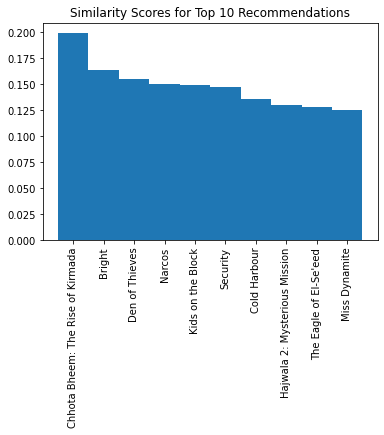

In [ ]:
import numpy as np                                                               
import matplotlib.pyplot as plt

recommendations = recommender_genre('Crime TV Shows')

labels, ys = zip(*recommendations)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels, rotation=90) #Replace default x-ticks with xs, then replace xs with labels
plt.title('Similarity Scores for Top 10 Recommendations')

## Linear Regression

In [ ]:
ratings = pd.read_csv('IMDb ratings.csv')
ratings

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,5.3,398,5.5,6.0,13,9,26,65,104,...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
85851,tt9911196,7.7,724,7.9,8.0,65,139,288,170,42,...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
85852,tt9911774,7.9,265,7.8,8.0,63,29,61,61,31,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0
85853,tt9914286,6.4,194,9.4,10.0,176,0,2,2,1,...,NaN,NaN,7.0,1.0,4.0,3.0,1.7,5.0,5.8,5.0


In [ ]:
movie_names = pd.read_csv('IMDb movies.csv')
movie_names

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3173: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN


In [ ]:
rating_df = pd.merge(ratings[['imdb_title_id','weighted_average_vote']], movie_names[['imdb_title_id','title']], on = 'imdb_title_id', how = 'inner')
rating_df = rating_df.set_index('imdb_title_id')
rating_df

,weighted_average_vote,title
imdb_title_id,,
tt0000009,5.9,Miss Jerry
tt0000574,6.1,The Story of the Kelly Gang
tt0001892,5.8,Den sorte drøm
tt0002101,5.2,Cleopatra
tt0002130,7.0,L'Inferno
...,...,...
tt9908390,5.3,Le lion
tt9911196,7.7,De Beentjes van Sint-Hildegard
tt9911774,7.9,Padmavyuhathile Abhimanyu


In [ ]:
movie_ratings = pd.merge(data, rating_df, how = 'left', on = 'title')
movie_ratings

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,title_sentiment_score,cast_length,first_country,date,description_sentiment_score,length_listed_in,listed_in_1,listed_in_2,listed_in_3,weighted_average_vote
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,...,-0.8225,0,United States,2021-09-25,-0.2960,1,Documentaries,None,None,NaN
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0.0000,19,South Africa,2021-09-24,-0.1531,3,International TV Shows,TV Dramas,TV Mysteries,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,...,0.0000,9,NaN,2021-09-24,-0.7783,3,Crime TV Shows,International TV Shows,TV Action & Adventure,NaN
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,...,0.0000,0,NaN,2021-09-24,0.2263,2,Docuseries,Reality TV,None,NaN
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0.0000,8,India,2021-09-24,0.7430,3,International TV Shows,Romantic TV Shows,TV Comedies,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9386,s8804,TV Show,Zombie Dumb,,,,"July 1, 2019",2018,TV-Y7,2 Seasons,...,-0.5106,0,NaN,2019-07-01,-0.2500,3,Kids' TV,Korean TV Shows,TV Comedies,NaN
9387,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,0.0000,7,United States,2019-11-01,-0.2732,2,Comedies,Horror Movies,None,NaN
9388,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,0.0000,9,United States,2020-01-11,-0.6808,2,Children & Family Movies,Comedies,None,4.4
9389,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,0.0000,9,United States,2020-01-11,-0.6808,2,Children & Family Movies,Comedies,None,6.1


In [ ]:
movie_ratings[movie_ratings['type'] == 'Movie'].weighted_average_vote.isnull().sum()

3988

In [ ]:
len(movie_ratings[movie_ratings['type'] == 'Movie'])

6580

In [ ]:
movie_rating_df = movie_ratings[movie_ratings['weighted_average_vote'].isnull() == False]
movie_rating_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,title_sentiment_score,cast_length,first_country,date,description_sentiment_score,length_listed_in,listed_in_1,listed_in_2,listed_in_3,weighted_average_vote
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",,"September 24, 2021",2021,TV-MA,1 Season,...,0.0000,16,NaN,2021-09-24,0.1280,3,TV Dramas,TV Horror,TV Mysteries,2.4
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,0.0000,8,United States,2021-09-24,-0.7845,3,Dramas,Independent Movies,International Movies,6.9
15,s16,TV Show,Dear White People,,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,...,0.3818,8,United States,2021-09-22,0.0000,2,TV Comedies,TV Dramas,None,6.1
19,s20,TV Show,Jaguar,,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",,"September 22, 2021",2021,TV-MA,1 Season,...,0.0000,8,NaN,2021-09-22,0.6369,3,International TV Shows,Spanish-Language TV Shows,TV Action & Adventure,5.5
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,...,0.0000,4,India,2021-09-21,0.8176,3,Comedies,International Movies,Romantic Movies,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9384,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,...,0.0000,6,United Arab Emirates,2016-03-09,0.0000,3,Dramas,International Movies,Thrillers,6.7
9385,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,...,0.0000,10,United States,2019-11-20,-0.6808,3,Cult Movies,Dramas,Thrillers,7.7
9388,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,0.0000,9,United States,2020-01-11,-0.6808,2,Children & Family Movies,Comedies,None,4.4
9389,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,0.0000,9,United States,2020-01-11,-0.6808,2,Children & Family Movies,Comedies,None,6.1


In [ ]:
!pip install statsmodels==0.13.1

     |████████████████████████████████| 9.8 MB 16.0 MB/s 
     |████████████████████████████████| 233 kB 22.3 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols("weighted_average_vote ~ description_sentiment_score ", data=movie_rating_df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     weighted_average_vote   R-squared:                       0.003
Model:                               OLS   Adj. R-squared:                  0.003
Method:                    Least Squares   F-statistic:                     9.515
Date:                   Sat, 27 Nov 2021   Prob (F-statistic):            0.00206
Time:                           22:50:27   Log-Likelihood:                -4919.6
No. Observations:                   2960   AIC:                             9843.
Df Residuals:                       2958   BIC:                             9855.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       5.9144      0.024    246.908      0.000       5.867       5.961
description_sentiment_score     0.1294      0.042      3.085      0.002       0.047       0.212
==============================================================================
Omnibus:                      107.152   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.295
Skew:                          -0.488   Prob(JB):                     2.05e-26
Kurtosis:                       3.079   Cond. No.                         1.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=03555c86-b158-41c2-8aa0-5472617f6588' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>